In [1]:
import quandl
import pandas as pd
import datetime
import numpy as n
from sklearn.svm import SVR
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.dates as mdates
import matplotlib.mlab as mlab
import matplotlib.mlab as mlab
import matplotlib.cbook as cbook
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = quandl.get("BITCOINWATCH/MINING")
df.head()

,Total BTC,Market Cap,Transactions last 24h,Transactions avg. per hour,Bitcoins sent last 24h,Bitcoins sent avg. per hour,Count,Blocks last 24h,Blocks avg. per hour,Difficulty,Next Difficulty,Network Hashrate Terahashs,Network Hashrate PetaFLOPS
Date,,,,,,,,,,,,,
2013-08-26,11608775.0,1.406983e+09,53292.0,2220.50,641072.88,26711.37,254350.0,165.0,6.88,65750060.0,68498336.0,490.33,6227.19
2013-08-27,11612775.0,1.504095e+09,57316.0,2388.17,882731.69,36780.49,254510.0,171.0,7.13,65750060.0,70053502.0,501.46,6368.57
2013-08-28,11617025.0,1.342254e+09,66380.0,2765.83,831597.17,34649.88,254680.0,170.0,7.08,65750060.0,70879556.0,507.38,6443.67
2013-08-29,11621875.0,1.381725e+09,61617.0,2567.38,2694076.29,112253.18,254874.0,194.0,8.08,65750060.0,72700400.0,520.41,6609.20
2013-08-30,11626775.0,1.391725e+09,60440.0,2518.33,684111.74,28504.66,255070.0,196.0,8.17,65750060.0,75286537.0,538.92,6844.31


In [3]:
sf = quandl.get("BCHAIN/MIREV")
sf.columns = ['miners_revenue']
sf.tail()

,miners_revenue
Date,
2018-01-30,2.165164e+07
2018-01-31,2.212487e+07
2018-02-01,1.584058e+07
2018-02-02,1.932917e+07
2018-02-03,2.034975e+07


In [4]:
pf = quandl.get("BCHAIN/CPTRA")
pf.columns = ['cost_per_transaction']
pf.tail()

,cost_per_transaction
Date,
2018-01-30,96.382352
2018-01-31,96.749249
2018-02-01,80.529148
2018-02-02,78.049647
2018-02-03,89.591902


In [5]:
temp_df = pd.merge(df,sf,left_index=True, right_index=True )
new_df = pd.merge(temp_df,pf,left_index=True, right_index=True )
new_df.head()

,Total BTC,Market Cap,Transactions last 24h,Transactions avg. per hour,Bitcoins sent last 24h,Bitcoins sent avg. per hour,Count,Blocks last 24h,Blocks avg. per hour,Difficulty,Next Difficulty,Network Hashrate Terahashs,Network Hashrate PetaFLOPS,miners_revenue,cost_per_transaction
Date,,,,,,,,,,,,,,,
2013-08-26,11608775.0,1.406983e+09,53292.0,2220.50,641072.88,26711.37,254350.0,165.0,6.88,65750060.0,68498336.0,490.33,6227.19,458603.60,8.567546
2013-08-27,11612775.0,1.504095e+09,57316.0,2388.17,882731.69,36780.49,254510.0,171.0,7.13,65750060.0,70053502.0,501.46,6368.57,511329.52,8.380253
2013-08-28,11617025.0,1.342254e+09,66380.0,2765.83,831597.17,34649.88,254680.0,170.0,7.08,65750060.0,70879556.0,507.38,6443.67,526846.50,8.277893
2013-08-29,11621875.0,1.381725e+09,61617.0,2567.38,2694076.29,112253.18,254874.0,194.0,8.08,65750060.0,72700400.0,520.41,6609.20,596683.12,9.698222
2013-08-30,11626775.0,1.391725e+09,60440.0,2518.33,684111.74,28504.66,255070.0,196.0,8.17,65750060.0,75286537.0,538.92,6844.31,610597.47,10.056616


In [52]:
new_df.index = pd.to_datetime(new_df.index)

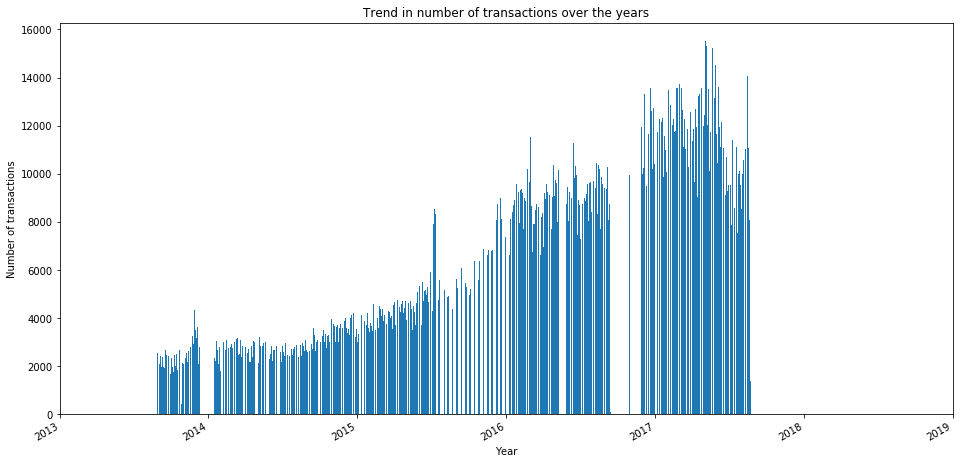

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(df.index, new_df['Transactions avg. per hour'])

datemin = datetime.date(new_df.index.year.min(), 1, 1)
datemax = datetime.date(new_df.index.year.max()+1, 1, 1)
ax.set_xlim(datemin, datemax)
ax.set_title('Trend in number of transactions over the years')
ax.set_xlabel('Year')
ax.set_ylabel('Number of transactions')
fig.set_size_inches(16,8)
fig.autofmt_xdate()

plt.show()

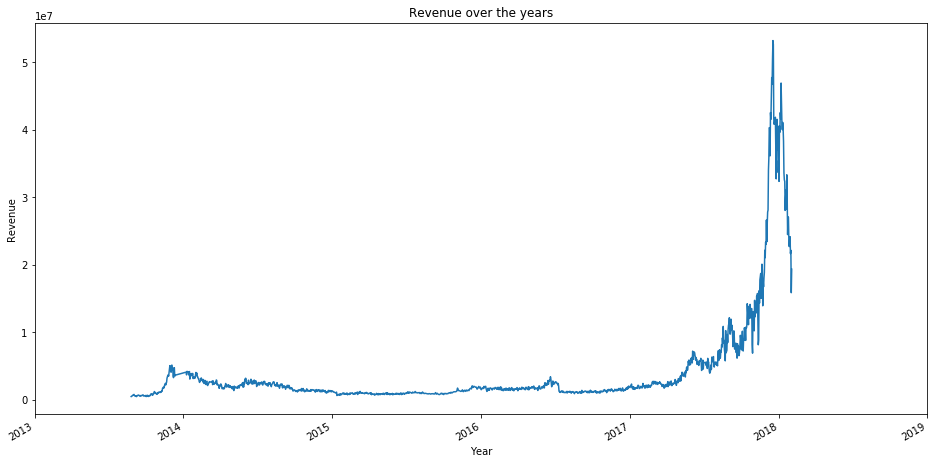

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(new_df.index, new_df['miners_revenue'])

datemin = datetime.date(df.index.year.min(), 1, 1)
datemax = datetime.date(df.index.year.max()+1, 1, 1)
ax.set_xlim(datemin, datemax)
ax.set_title('Revenue over the years')
ax.set_xlabel('Year')
ax.set_ylabel('Revenue')
fig.set_size_inches(16,8)

fig.autofmt_xdate()

plt.show()

In [8]:
new_df['miners_revenue'].corr(new_df['cost_per_transaction'])

0.8563124279034425

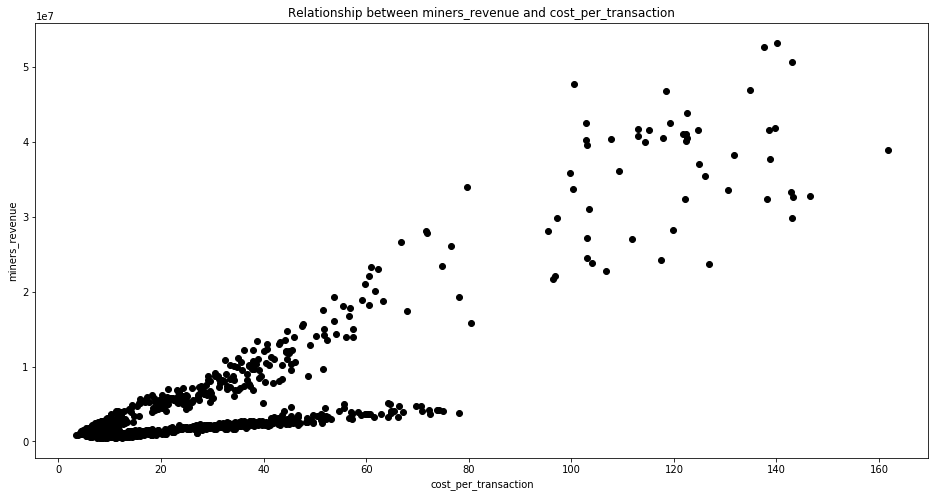

In [9]:
fig, ax1 = plt.subplots()
x = new_df['cost_per_transaction']
y = new_df['miners_revenue']
ax1.plot(x, y,'bo',color = 'black')
ax1.set_title('Relationship between miners_revenue and cost_per_transaction')
ax1.set_xlabel('cost_per_transaction')
ax1.set_ylabel('miners_revenue')
fig.set_size_inches(16,8)

plt.show()

Text(0,0.5,'Number of transactions')

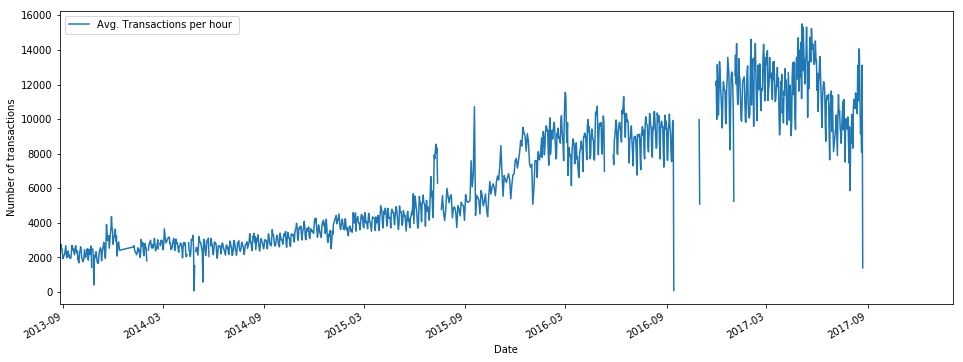

In [10]:
new_df['Transactions avg. per hour'].plot(label='Avg. Transactions per hour ',figsize=(16,6))
plt.legend()
plt.ylabel('Number of transactions')